# python for data science - sesi 8
Note :
## Advanced Visualization

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_can = pd.read_excel('datasets/Canada.xlsx', sheet_name ='Canada by Citizenship',
                      skiprows=range(20), skipfooter=2)

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] =  df_can.sum (axis = 1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [5]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [6]:
#### import ke csv
df_can.to_csv('Canada_cleaned.csv', index = True) ## kalo index true berarti pake index yg udh di set

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

## Word Clouds

In [1]:
##!pip install wordcloud

  Using cached wordcloud-1.7.0.tar.gz (216 kB)
Using legacy setup.py install for wordcloud, since package 'wheel' is not installed.
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'done'


## Regression Plot

In [2]:
# import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


In [8]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float,df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


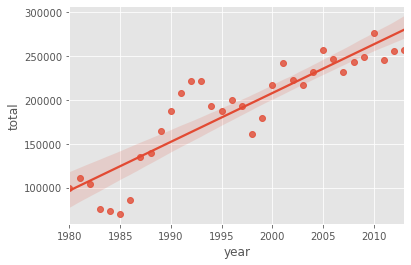

In [9]:
ax = sns.regplot(x = 'year', y='total', data = df_tot)

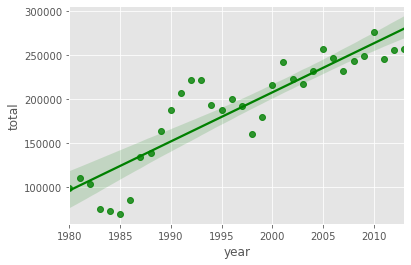

In [10]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

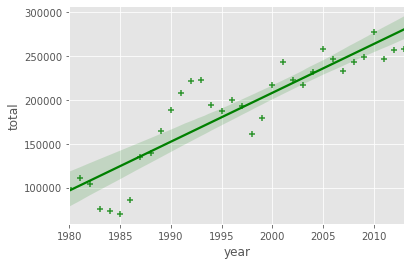

In [11]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

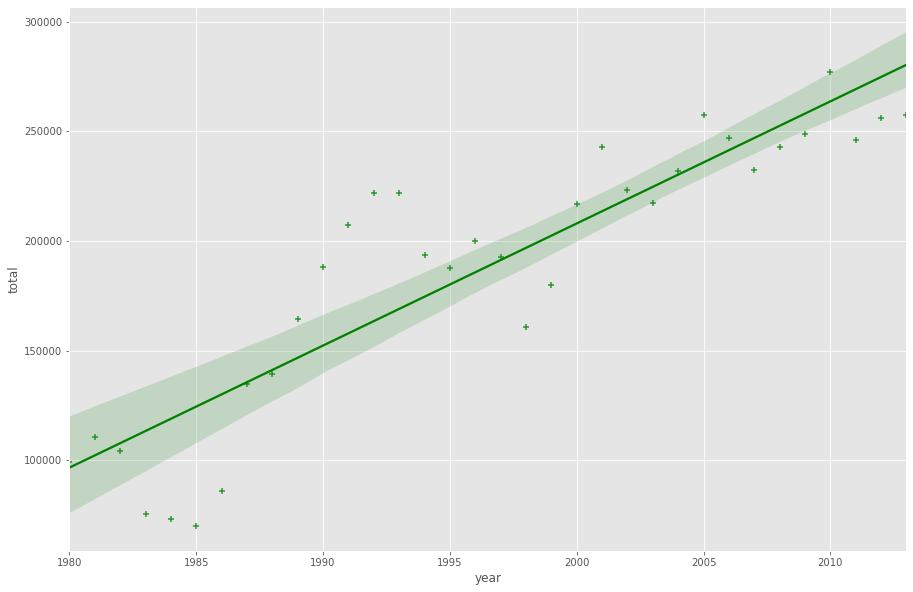

In [14]:
plt.figure(figsize=(15, 10))### kita buat kanvasnya dulu baru isi pake yg bawah
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

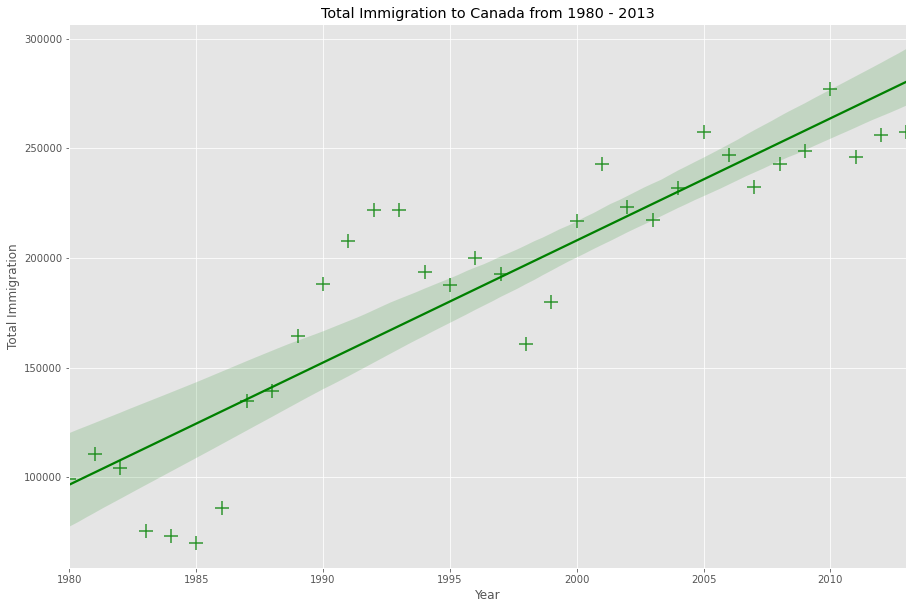

In [15]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

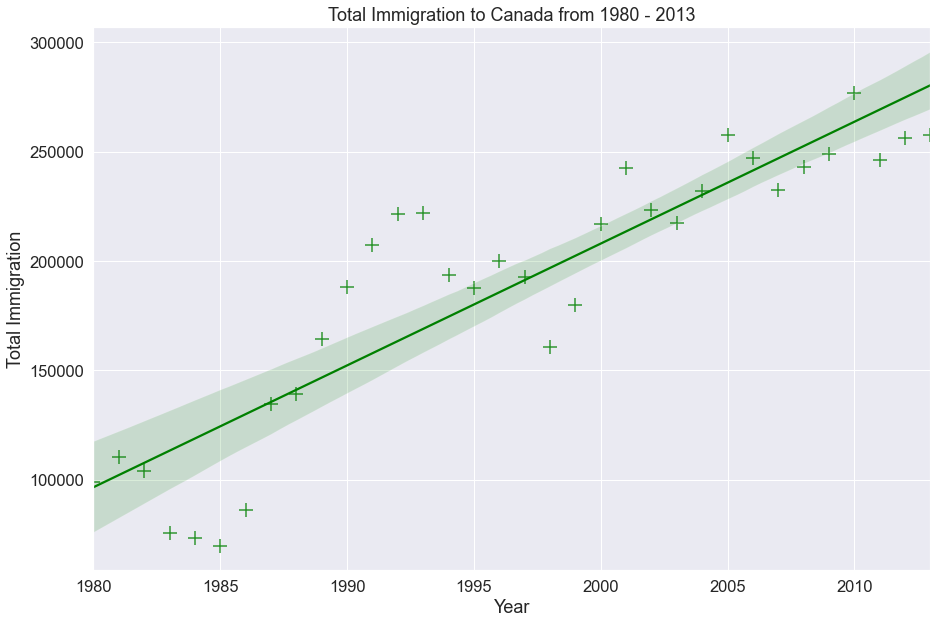

In [16]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

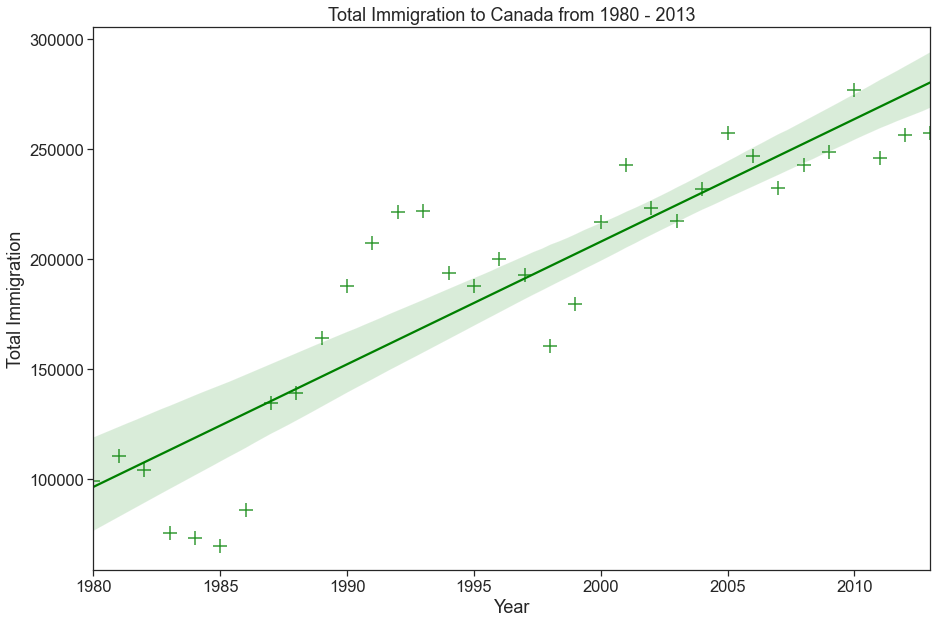

In [17]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

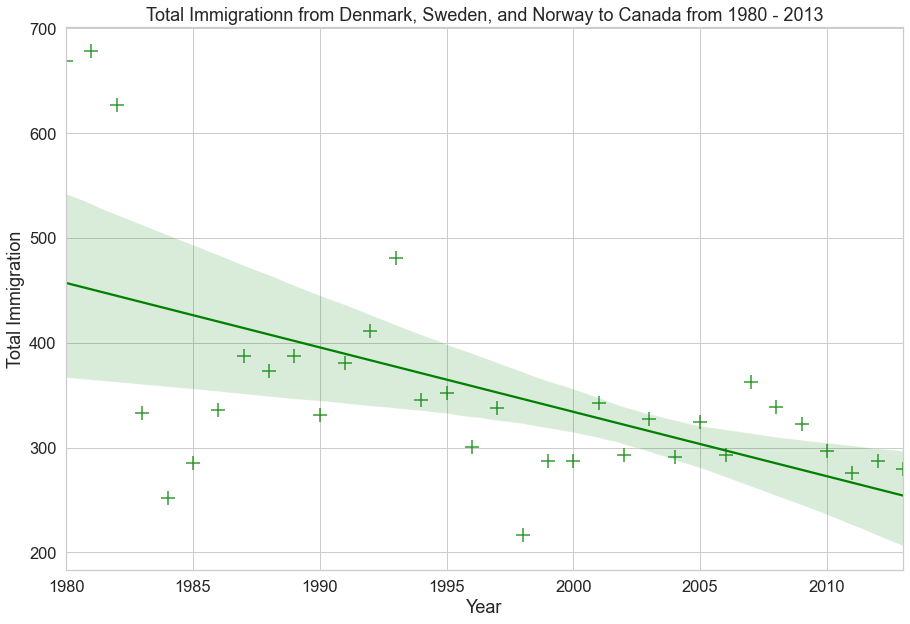

In [18]:
### type your answer here
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))
# reset index in place
df_total.reset_index(inplace=True)
# rename columns
df_total.columns = ['year', 'total']
# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
# define figure size
plt.figure(figsize=(15, 10))
# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

## Folium

In [7]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import folium

In [8]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [9]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=8)

# display world map
world_map

In [11]:
# define the world map centered around Canada with a higher zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=11)

# display world map
world_map

In [12]:
### type your answer here
world_map = folium.Map(location=[-6.2607187, 106.7794275], zoom_start=15)
# display world map
world_map

In [13]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Toner')

# display map
world_map

In [14]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Terrain')

# display map
world_map

In [15]:
### type your answer here

world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Terrain')
# display world map
world_map

In [18]:
df_incidents = pd.read_csv('datasets/s8/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [19]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [20]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [21]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

In [22]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

In [23]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

In [24]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

In [25]:
from folium import plugins

In [26]:
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

## Choropleth Maps

In [34]:
df_can.index()

TypeError: 'Index' object is not callable

In [39]:
world_geo  = r'datasets/s8/world_countries.json'

In [40]:


# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=[df_can.index, 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map